#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import csv

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

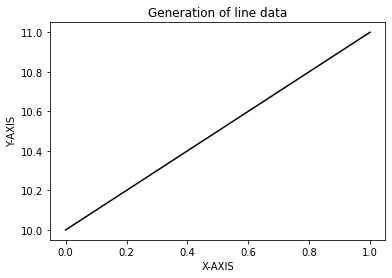

In [2]:
#Generate  𝑥 , 1000 points from 0-1

x = np.linspace(0,1,1000)

#initialize weights w0 = 10, w1 = 1

w0 = 10
w1 = 1

y = w0 + w1*x

#Plot ( 𝑥 , 𝑦 )
plt.title("Generation of line data")
plt.plot(x, y, color='black')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.show()

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

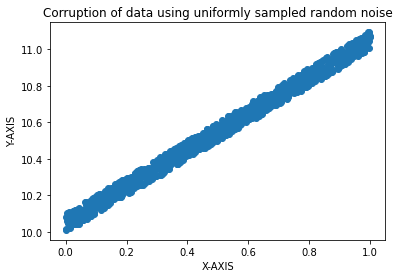

In [3]:
#Generate random numbers uniformly from (0-1) with same size as  𝑦

noise = np.random.random(y.shape)

#Corrupt  𝑦  and generate  𝑦𝑐𝑜𝑟  by adding the generated random samples with a weight of 0.1.

noise = 0.1*noise
y_corrupt = y + noise

#Plot ( 𝑥 , 𝑦𝑐𝑜𝑟 ) (use scatter plot)
plt.title("Corruption of data using uniformly sampled random noise")
plt.scatter(x, y_corrupt)
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.show()

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

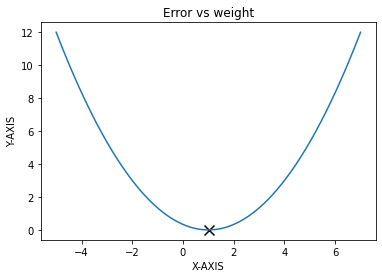

In [4]:
#Heuristically predicting the curve (Generating the Error Curve)

#initializing the values of weight

w0 = 10
w1 = np.linspace(-5, 7, 1000) #search space
m = y.shape[0] #number of data points

#finding y_pred

def y_pred(X, w_1, w_0):
    predicted_y = w_0 + w_1*X
    return predicted_y

def Error(predicted, true, m):
    diff = true - predicted
    err = np.matmul(diff, diff.T)
    err = err/m
    return err

#Find  𝑦𝑝𝑟𝑒𝑑  using each value of  𝑤1
Error_values = []

for weight in w1:
    Error_values.append(Error(y_pred(x, weight, w0), y, m))
    
#The  𝑦𝑝𝑟𝑒𝑑  that provide least norm error with y, will be decided as best  𝑦𝑝𝑟𝑒𝑑
min_error = np.min(Error_values)
min_index_error = np.argmin(Error_values)
min_weight = w1[min_index_error]

#plot error vs search
plt.title('Error vs weight')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.plot(w1, Error_values)
plt.scatter(min_weight, min_error, color='black' ,marker='x', s=100)
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

In [5]:
#using gradient descent to predict the curve

def GradientDescent(x, y, iterations, alpha, init_value):
    
    #intializing one weight to 10
    w0 = 10
    m = y.shape
    w1 = init_value
    
    error_values = []
    w1_values = []
    
    for i in range(iterations):
        
        #minimizing the error function w.r.t w1
        y_pred = w0 + w1*x
        error = y - y_pred
        squared_error = np.matmul(error, np.transpose(error))
        error = squared_error/m
        error_values.append(error)

        #derivative of the error function
        Derror = -2*(np.matmul((y-y_pred), x))/m

        #new weights defining
        w1 = w1 - alpha*(Derror)
        w1_values.append(w1)
        
    return w1, w1_values, error_values

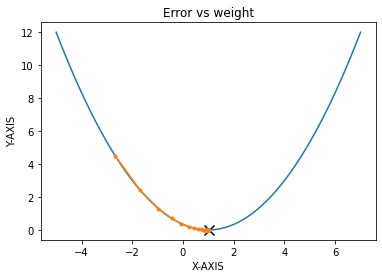

Optimal Value of W1 is : 1.0


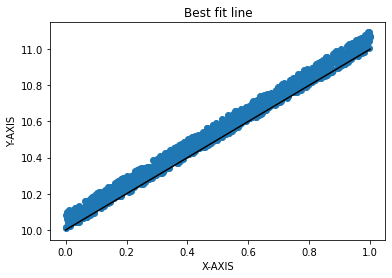

In [6]:
iterations = 400

w1_optimal, w1_vector, Error_Function = GradientDescent(x, y, iterations, 0.4, -4)
Error_values_new = []

for weight in w1_vector:
    Error_values_new.append(Error(y_pred(x, weight, w0), y, m))
    
#plotting the vector values
#plot error vs search
plt.title('Error vs weight')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.plot(w1, Error_values)
plt.plot(w1_vector, Error_values_new, marker='.')
plt.scatter(min_weight, min_error, color='black' ,marker='x', s=100)
plt.show()

#plotting the optimal line obtained by the gradient descent approach
print("Optimal Value of W1 is :", w1_optimal[0])

#plottiny the best fit line
plt.title("Best fit line")
plt.scatter(x, y_corrupt)
plt.plot(x, w0 + w1_optimal*x, color='black')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.show()

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

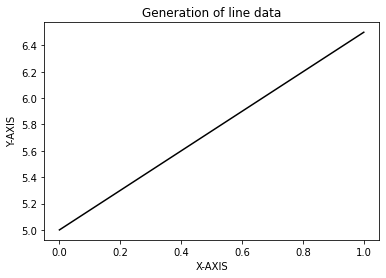

In [7]:
#Generate  𝑥 , 1000 points from 0-1

x = np.linspace(0,1,1000)

#initialize weights w0 = 5, w1 = 1.5

w0 = 5
w1 = 1.5

y = w0 + w1*x

#Plot ( 𝑥 , 𝑦 )
plt.title("Generation of line data")
plt.plot(x, y, color='black')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.show()

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

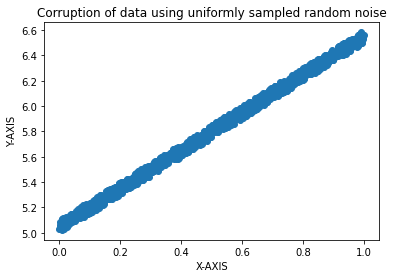

In [8]:
#Generate random numbers uniformly from (0-1) with same size as  𝑦

noise = np.random.random(y.shape)

#Corrupt  𝑦  and generate  𝑦𝑐𝑜𝑟  by adding the generated random samples with a weight of 0.1.

noise = 0.1*noise
y_corrupt = y + noise

#Plot ( 𝑥 , 𝑦𝑐𝑜𝑟 ) (use scatter plot)
plt.title("Corruption of data using uniformly sampled random noise")
plt.scatter(x, y_corrupt)
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.show()

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

Text(0.5, 0, 'z')

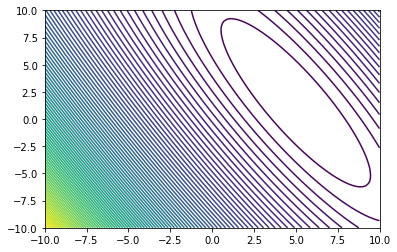

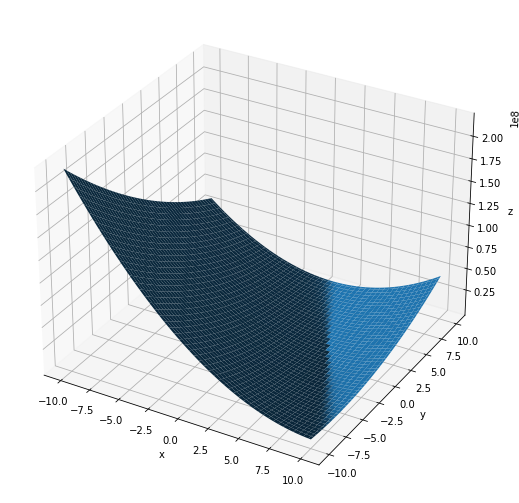

In [9]:
#defining the cost function
def J(w0, w1, x, y, m):
    J = 0
    for i in range(m):
        #predicted value - true value
        J += (y[i] - (w0 + w1*x[i]))**2
    return J/2*m


#plotting the error function with 2 variables

#intializing the weights
a0 = np.linspace(-10,10,100)
a1 = a0

#creating a meshgrid to plot and plotting the cost function
w0, w1 = np.meshgrid(a0, a1)

#contour plot
fig = plt.figure()
plt.contour(w0, w1, J(w0,w1,x,y,len(x)), 100)

#3D plot
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, J(w0,w1,x,y,len(x)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

**Gradient Descent to find optimal Values**

In [10]:
#Gradient Decsent to find the optimal values

#intialize the weights
w0_init = -5
w1_init = -5

#Gradient Descent algorithm

#derivative of J wrt wo
def dJ_dwo(w0, w1, x, y):
    J = 0
    for i in range(m):
        #predicted value - true value
        J += (y[i] - (w0 + w1*x[i]))
    return -J/m

#derivative of J wrt w1
def dJ_dw1(w0, w1, x, y):
    J = 0
    for i in range(m):
        #predicted value - true value
        J += (y[i] - (w0 + w1*x[i]))*(x[i])
    return -J/m

def GradientDescent(x, y, w0, w1, lrate, iterations):
    PathDetector_w0 = []
    PathDetector_w1 = []
    for i in range(iterations):
        w0 = w0 - lrate*(dJ_dwo(w0, w1, x, y))
        w1 = w1 - lrate*(dJ_dw1(w0, w1, x, y))
        
        PathDetector_w0.append(w0)
        PathDetector_w1.append(w1)
        
    return w0, w1, PathDetector_w0, PathDetector_w1

Optimal values of w0, w1 are 5.047957954224405 1.4105365682442528


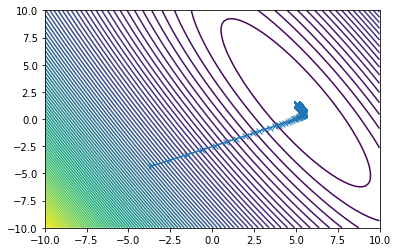

In [11]:
#𝑤0=5  and  𝑤1=1.5

w0_optimal, w1_optimal, w0_values, w1_values =  GradientDescent(x, y, w0_init, w1_init, 0.1, 400)

#optimal values of w0, w1 are
print('Optimal values of w0, w1 are', w0_optimal, w1_optimal)

#contour plot
fig = plt.figure()
plt.contour(w0, w1, J(w0,w1,x,y,len(x)), 100)

#line plot
plt.plot(w0_values, w1_values, marker='x')
plt.show()

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

(900,)


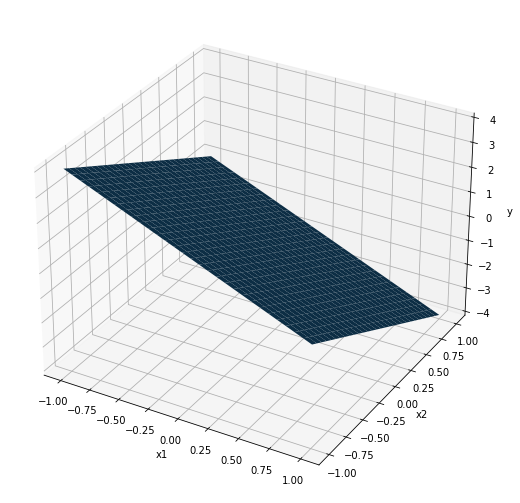

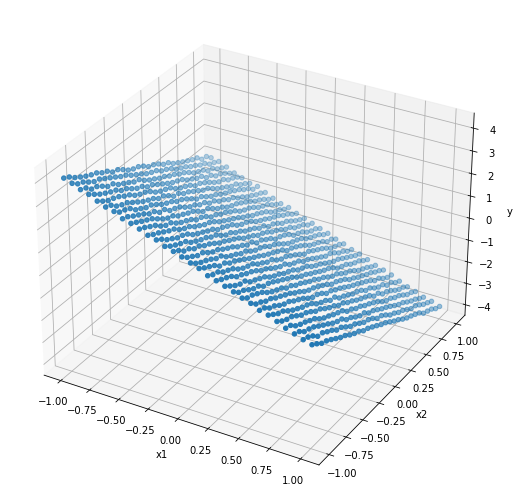

In [12]:
#Generate  𝑥1  and  𝑥2  from range -1 to 1, (30 samples)

#generation of data
x1 = np.linspace(-1,1,30)
x2 = x1


w0 = 0
w1 = -2
w2 = -2

y= w0 + w1*x1 + w2*x2

X1, X2 = np.meshgrid(x1,x2)
Y = w0 + w1*X1 + w2*X2

#plotting the figure
plt.figure(figsize=[16, 9])
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

# corupt the data using random noise

rand = np.random.uniform(0,1,Y.shape)
Y_corrupt = Y+0.1*rand

plt.figure(figsize=[16, 9])
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y_corrupt,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

# generated corrupted data points
x1 = X1.flatten()
x2 = X2.flatten()
Y_corrupt=Y_corrupt.flatten()

print(x1.shape)

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

(100, 100)
(100, 100)


Text(0, 0.5, 'w1')

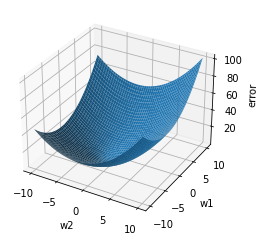

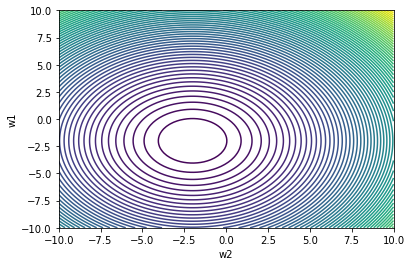

In [13]:
def f(w2,w1,w0,x1,x2):
    return (w0+w1*x1+w2*x2)

srch_w2 = np.linspace(-10,10,100)
srch_w1 = np.linspace(-10,10,100)

ww2, ww1 = np.meshgrid(srch_w2,srch_w1)
print(ww1.shape)

def error(w2,w1,w0,x1,x2,y):
    if len(w1.shape)==0:
        return np.mean(np.power(y-(f(w2,w1,w0,x1,x2)),2))
    else:
        err=np.zeros(w1.shape)
        for x1_i,x2_i,y_i in zip(x1,x2,y):
            err1=np.power((np.tile(y_i,w1.shape)-(f(w2,w1,w0,x1_i,x2_i))),2)
            err=err+err1
    return err/x1.shape[0]

err = error(ww2,ww1,w0,x1,x2,Y_corrupt)
print(err.shape)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww2,ww1,err)
ax.set_xlabel('w2')
ax.set_ylabel('w1')
ax.set_zlabel('error');

plt.figure()
plt.contour(ww2, ww1, err,100)
plt.xlabel('w2')
plt.ylabel('w1')

**Prediction using Gradient Descent**

Optimal Value of w1 is : -1.999254276874417
Optimal Value of w2 is : -2.002277789665342


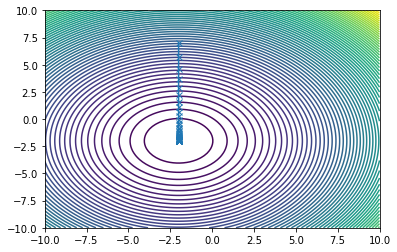

In [14]:
# Gradient descent
w2_init = 7 # initialization 
w1_init = -2
lr = 0.1

# Gradient computation 
def GradDescent(y_actual, w2, w1,w0, lr, x1,x2, iterations):
    PathDetector_w2 = [w2]
    PathDetector_w1 = [w1]
    
    for i in range(iterations):
        w2 = w2 + lr*np.average(2*(y_actual - f(w2,w1, w0,x1,x2))*x2)
        w1 = w1 + lr*np.average(2*(y_actual - f(w2,w1, w0,x1,x2))*x1)
        
        PathDetector_w2.append(w2)
        PathDetector_w1.append(w1)
    return w2, w1, PathDetector_w1, PathDetector_w2  


plt.figure()
plt.contour(ww2, ww1, err,100)

w2_opt, w1_opt, path_w1, path_w2 = GradDescent(Y_corrupt, w2_init, w1_init, 0, 0.2, x1, x2, 100)
print("Optimal Value of w1 is :", w1_opt)
print("Optimal Value of w2 is :", w2_opt)
plt.plot(path_w1, path_w2, marker='x')
plt.show()

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.04949138]
 [1.99684895]
 [2.99792916]
 [4.99972416]
 [8.99919355]
 [2.99605479]]
[[1.05076149]
 [1.97833638]
 [2.9920635 ]
 [4.97701003]
 [8.96874675]
 [2.97189595]]


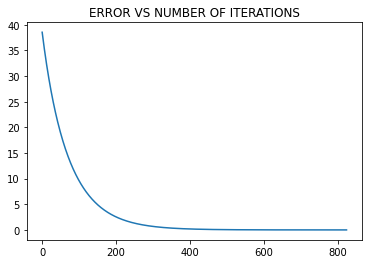

In [15]:
#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

class regression:
    # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self, w_old, lr, y, x):
        #@ corresponds to dot product of the given two vectors
        w = w_old + (2/x.shape[1])*lr*(x @ (y - (x.T @ w_old)))
        return w

    def error(self, w, y, x):
        return np.mean(np.power((y - x.T @ w),2))

    def mat_inv(self, y, x_aug):
        #(XX')-1 XY
        return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y
    
    # by Gradien descent
    def Regression_grad_des(self, x, y, lr):
        err = []
        for i in range(1000):
            #initialization step
            if i == 0:
                w_init = np.random.uniform(-1,1,(x_aug.shape[0],1))
                w_old = w_init
                w_pred = self.grad_update(w_old,lr,y,x_aug)
            
            #itereations
            else:
                w_old = w_pred
                w_pred = self.grad_update(w_old,lr,y,x_aug)

                err.append(self.error(w_pred,y,x_aug))
                dev = np.abs(self.error(w_pred,y,x_aug)-self.error(w_old,y,x_aug))
                
                #convergence criterion
                if dev <= 1e-5:
                    break

        return w_pred,err


############################################################################################################
# Generation of data

sim_dim = 5
sim_no_data = 1000
x = np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

#intial weight initialization
w = np.array([[1],[2],[3],[5],[9],[3]])
print(w.shape)

## Augment the Input

x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y = x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
noise = np.random.uniform(0,1,y.shape)
y = y + 0.1*noise

### the data (x_aug and y is generated)#####
###############################################################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt = reg.mat_inv(y,x_aug)
print(w_opt)

# By Gradient Descent approach
lr = 0.01 #learning rate
w_pred, err = reg.Regression_grad_des(x_aug, y, lr)
print(w_pred)

plt.title('ERROR VS NUMBER OF ITERATIONS')
plt.plot(err)
plt.show()

#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [16]:
#getting the data set in matrix form and not as a pandas data frame
with open('salary_pred_data.csv','rt')as f:
    data = csv.reader(f)
    row1 = []
    for row in data:
        row1.append(row)
        

X = row1[1:]
X

[['2', '11', '34', '4', '3', '41368'],
 ['4', '14', '28', '1', '4', '49756'],
 ['1', '13', '55', '3', '2', '34310'],
 ['4', '19', '47', '1', '7', '65294'],
 ['2', '10', '24', '2', '6', '55648'],
 ['4', '2', '45', '3', '1', '34190'],
 ['3', '11', '39', '4', '2', '38378'],
 ['2', '19', '36', '4', '6', '57172'],
 ['2', '8', '36', '1', '9', '70172'],
 ['1', '7', '40', '2', '9', '68380'],
 ['1', '3', '20', '2', '1', '27940'],
 ['4', '13', '53', '1', '1', '34706'],
 ['3', '11', '47', '4', '9', '73394'],
 ['4', '12', '45', '4', '3', '45490'],
 ['3', '5', '45', '2', '1', '32190'],
 ['3', '4', '44', '2', '7', '62088'],
 ['2', '10', '56', '2', '9', '70712'],
 ['1', '7', '57', '4', '4', '44014'],
 ['1', '7', '28', '4', '5', '48956'],
 ['2', '5', '44', '2', '9', '70188'],
 ['3', '13', '29', '4', '8', '68558'],
 ['3', '11', '26', '2', '2', '37752'],
 ['3', '3', '59', '4', '4', '47618'],
 ['1', '11', '52', '1', '2', '33504'],
 ['1', '11', '26', '4', '7', '59352'],
 ['1', '8', '31', '2', '2', '33462'

In [17]:
#Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)

#getting the data set in matrix form and not as a pandas data frame
with open('salary_pred_data.csv','rt')as f:
    data = csv.reader(f)
    row1 = []
    for row in data:
        row1.append(row)
        
#seperating the header file
X = row1[1:]

#print(len(X))
XX = np.zeros((len(X),len(X[0])))

for i in range(len(X)):
    XX[i,:] = X[i]
    
X = XX.T #taking transpose


#doing train test split - 90/10
train_data = X[:,0:900]
test_data = X[:,900:]

#splitting data into parameters and features
x_train = train_data[0:5,:]
y_train = train_data[5,:]
y_train = y_train.T
y_train = y_train[:,np.newaxis]

x_test = test_data[0:5,:]
y_test = test_data[5,:]
y_test = y_test.T
y_test = y_test[:,np.newaxis]


#data preprocessing/ augmentaion

x_train = np.concatenate((np.ones((1,x_train.shape[1])), x_train),axis=0)

#model initalization
reg = regression()

# by computation
w_pred = reg.mat_inv(y_train,x_train)

def aug(x):
    return np.concatenate((np.ones((1,x.shape[1])), x),axis=0) 

y_pred = (aug(x_test)).T @ w_pred

# finding the mean square error

error = reg.error(w_pred,y_test,aug(x_test))/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error=',error,'\n')

print('Error of the function ', np.sum((y_pred - y_test)**2))

Normalized testing error= 6.130807996070269e-27 

Error of the function  2.5375632733015024e-16


In [18]:
#Read data from csv file

data = pd.read_csv('salary_pred_data.csv')
data.head()

,Level of city,Years of experiance,Age,Level of education,Job profile,Salary
0,2,11,34,4,3,41368
1,4,14,28,1,4,49756
2,1,13,55,3,2,34310
3,4,19,47,1,7,65294
4,2,10,24,2,6,55648


In [19]:
#Do train test split (90% and 10%)

#train data
train_data = data[:900]
paramters_train = train_data[['Level of city', 'Years of experiance', 'Age', 'Level of education', 'Job profile']]
target_train = train_data['Salary']

#test_Data
test_data = data[900:]
paramters_test = test_data[['Level of city', 'Years of experiance', 'Age', 'Level of education', 'Job profile']]
target_test = test_data['Salary']

In [20]:
#Also find the optimal weight values using regression class from the Sci-kit learn library

#import linear regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(paramters_train, target_train)
w_optimal = reg.coef_
print('Weights are', w_optimal.T)

#testing
def aug(x):
    return np.concatenate((np.ones((1,x.shape[1])), x), axis=0) 

y_pred = reg.predict(aug(paramters_test))

Error = np.mean((y_pred[1:] - target_test)**2)
print('The error value with these weights is', Error)

Weights are [2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
The error value with these weights is 2.6800651846718097e-22
